<a href="https://colab.research.google.com/github/elsioantunes/proc-video/blob/main/trabalhoT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de video - Trabalho para o seminário da disciplina
## Integrantes: 
> Elsio Antunes  [RA 11097612]




<img width=400 src='https://github.com/elsioantunes/proc-video/blob/main/contrast.jpg?raw=true'>


## Objetivos:

1. Aplicar uma quantidade de conceitos de processamento de vídeo da disciplina.
 $\color{#DDDD00}{\text{em processo}}$
2.  Executar a aplicação com cenas pré-gravadas, para testes e gravação de “demo”. $\color{#DDDD00}{\text{em processo}}$
3.  Executar a aplicação com captura de vídeo em tempo real, mostrando na tela $\color{#dd0000}{\text{not ok}}$


# Tema do trabalho
O tema é a captura do estado de um cubo mágico. 
Dado um cubo mágico do tipo *rubik cube 3x3*, proceder a estração da posição das suas partes integrantes por intermédio da visualização das cores a partir de um video com a movimentação do objeto. 


# Cenário de aplicação
Uma das possibilidades seria a construção de um módulo de entrada (*picker*) para a utilização em um aplicativo para celulares que necessite da informação do estado do cubo para proceder a resolução (*solver*) do problema.

# Metodologia
Para fins de testes de implementaçãodo do protótipo do projeto, a partir da utilização da biblioteca OpenCV sobre a linguagem Python sobre o formato de documento Jupter Notebook sobre a plataforma Colab (Colabolatory Google Research), que me permite organizar em formato Rich Text, HTML ou LaTex, um documento para descrição do código em blocos, desenvolveremos os seguintes processos:

## Familiarização com a plataforma OpenCV
Exercícios, pesquisa, resolução de pequenos sub problemas e atenta leitura da documentação **OpenCV** são partes fundamentais para o desenvolvimento de projetos, dado que a plataforma é consolidada e de grande volume, cobrindo quase todos os algoritmos e assuntos relacionados a edição imagens e video.  

## Estudo de espaço de cores
Importante area da ciência, com ramos de interesse profissional e científico. Organizações específicas de cores e o funcionamento de dispositivos que permitem captura e reprodução de imagens demandam a atenção de quem almeja estudar e construir novas tecnologias.

## Representação e qualificação de imagens
Como visto nos laboratórios, em especial o LAB 4 que tratou sobre histogramas, o processamento de imagens abrange formas de medir, descrever, comparar, reconhecer critérios de ações, tanto para editar quanto para extrair informações e até ações que extrapolam o campo dos dispositivos de exibição. Por exemplo, a utilização de processamento de imagem em processos industriais. 

## Filtros e transformações
O principal processamento possível em imagens é a aplicação de filtros. Filtros para as mais diversas modificações na imagem original. Em especial a suavização e a retirada de ruídos da imagem são as principais técnicas, motivadas inicialmente pela melhoria da qualidade de imagem e posteriormente utilizadas como componente de outras transformações. Outros exemplos são a clusterização de cores e o reconhecimento de bordas, útil na compactação de imagens e videos, na exibição eficiente, na captura de movimentos e reconhecimento de objetos. 

## Abertura e Fechamento (Mathematical morphology)
Em nosso projeto, utilizamos as técnicas de abertura e fechamento. Conceitos da **teoria dos conjuntos** e **topologia** que consistem em considerar as bordas de áreas e, a partir de uma aplicação de um filtro com kernel específico, retirar ou acrescentar, diminuir ou aumentar esta borda. Com efeito, podemos 'fechar buracos' e/ou eliminar pequenas areas consideradas ruído e assim definir melhores contornos e conjuntos de interesse. 

<center><img width=180 src='https://upload.wikimedia.org/wikipedia/commons/f/fc/DilationErosion.png'></center>


## Segmentação de cores
Apartir do estudo do espaço de cores e de uma pesquisa dos limites da variação dos valores no caso concreto é possivel delimitar as areas de interesse de uma imagem utilizando uma máscara. E então, utilizando uma operação *bit a bit* da máscara com a imagem original obtém-se o objeto capturado.  


## Resultados preliminares
Abaixo o *link* para o video dos resultados preliminares e o link para o código em Python do processamento dos frames de um video de entrada. 

<IMG src='https://github.com/elsioantunes/proc-video/blob/main/cubo1.png?raw=true'><br><IMG src='https://github.com/elsioantunes/proc-video/blob/main/cubo2.png?raw=true'><br><IMG src='https://github.com/elsioantunes/proc-video/blob/main/cubo3
.png?raw=true'>


https://github.com/elsioantunes/proc-video/blob/main/testeRubik4.mp4


Página do github: https://elsioantunes.github.io/proc-video/




# Video


frame count: 272.0
width, height, fps: 1920 1080 29.58401109883815
frame:0


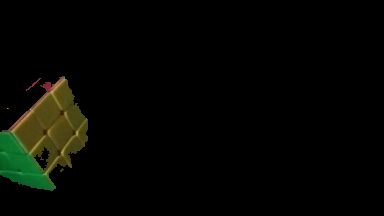

frame:1


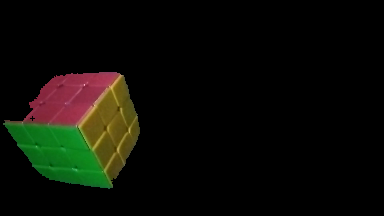

frame:2


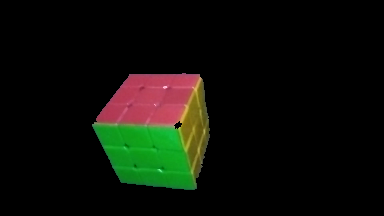

frame:3


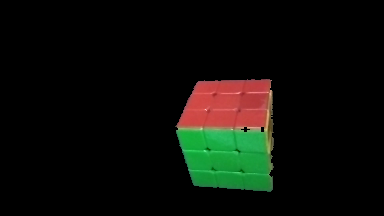

frame:4


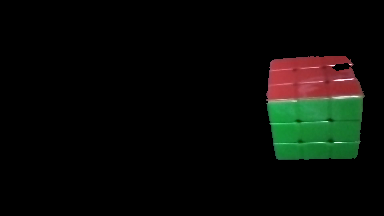

frame:5


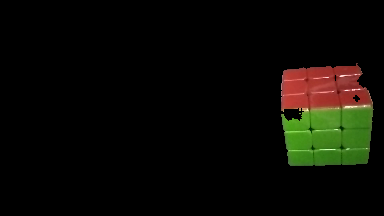

frame:6


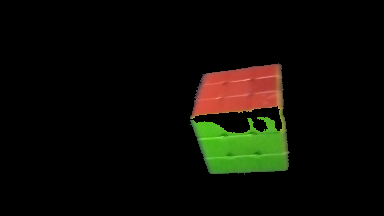

frame:7


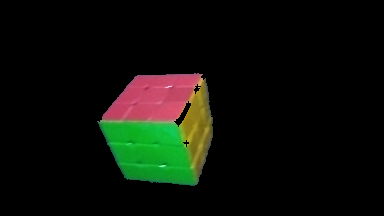

frame:8


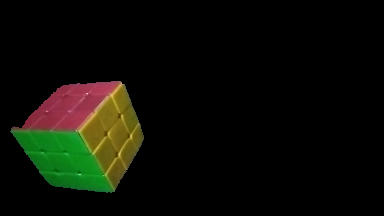

frame:9


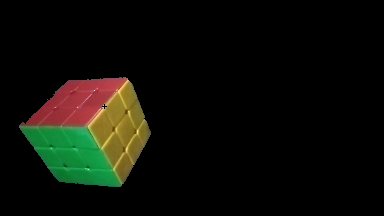

In [ ]:
def process(frameTest):
    verde = np.array([29, 162, 16])
    vermelho = np.array([95, 70, 189])
    amarelo = np.array([24, 109, 124])

    maskFrameGreen = cv.inRange(frameTest, verde-74, verde+74)
    maskFrameRed = cv.inRange(frameTest, vermelho-57, vermelho+57)
    maskFrameYellow = cv.inRange(frameTest, amarelo-54, amarelo+54)

    redOrGreen = cv.bitwise_or(maskFrameRed, maskFrameGreen)
    redOrGreenOrYellow = cv.bitwise_or(redOrGreen, maskFrameYellow)

    kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
    maskOpen = cv.morphologyEx(redOrGreenOrYellow, cv.MORPH_OPEN, kernel)

    kernel = cv.getStructuringElement(cv.MORPH_CROSS,(25,25))
    maskClose = cv.morphologyEx(maskOpen, cv.MORPH_CLOSE, kernel)

    maskedFrame = cv.bitwise_and(frameTest, frameTest, mask=maskClose)
    return maskedFrame

inUrl = '/content/drive/MyDrive/((UFABC))/(proc video)/rubik4.mp4'
outUrl = '/content/drive/MyDrive/((UFABC))/(proc video)/teste.webm'
saida = None

def openVideo(url):
    cap = cv.VideoCapture(url)
    ret, frame = cap.read()
    vheight, vwidth = frame.shape[:2]
    fps = cap.get(cv.CAP_PROP_FPS)
    print("frame count:", cap.get(cv.CAP_PROP_FRAME_COUNT))
    print("width, height, fps:", vwidth, vheight, fps)
    return cap

def newVideo(frame):
    fourcc = cv.VideoWriter_fourcc(*'VP90')
    vheight, vwidth = frame.shape[:2]
    return cv.VideoWriter(outUrl, fourcc, 25, (vwidth, vheight))

 
x = 0
i = 0
frames = []
cap = openVideo(inUrl)

while True:
    ret, atualFrame = cap.read()
    if ret: 
        atualFrame = process(atualFrame)
        atualFrame = cv.resize(atualFrame, (384, 216))
        
        if saida == None: 
            saida = newVideo(atualFrame)
        saida.write(atualFrame)

        if (x % 30) == 0:
            print (f"frame:{i}")
            frames.append(atualFrame)
            show(atualFrame) 
            i = i + 1
        x = x + 1
    else: break

cap.release()
saida.release()

In [ ]:
video = open(outUrl, 'rb').read()
vidDec = "data:video/mp4;base64," + b64encode(video).decode()
HTML(f'<video width={vwidth} controls><source src= "{vidDec}" type="video/mp4"></video>')

# REFERÊNCIAS


*   Color spaces in OpenCV (C++ / Python) <BR>
https://learnopencv.com/color-spaces-in-opencv-cpp-python/

*   Morphological Transformations (OpenCV doc) <br>
https://docs.opencv.org/4.5.2/d9/d61/tutorial_py_morphological_ops.html
    
* OpenCV Object Detection Using Color segmentation (video) <br>
https://www.youtube.com/watch?v=efWITgemKvs


* Mathematical morphology <br>
https://en.wikipedia.org/wiki/Mathematical_morphology




